In [156]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [74]:
# 1

col_names = [
    "pregnant",
    "glucose",
    "bp",
    "skin",
    "insulin",
    "bmi",
    "pedigree",
    "age",
    "label",
]
X = pd.read_csv("diabetes.csv", header=None, names=col_names)[1:]
y = X["label"]
X.drop("label", axis=1, inplace=True)
X

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age
1,6,148,72,35,0,33.6,0.627,50
2,1,85,66,29,0,26.6,0.351,31
3,8,183,64,0,0,23.3,0.672,32
4,1,89,66,23,94,28.1,0.167,21
5,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
764,10,101,76,48,180,32.9,0.171,63
765,2,122,70,27,0,36.8,0.34,27
766,5,121,72,23,112,26.2,0.245,30
767,1,126,60,0,0,30.1,0.349,47


In [75]:
# 2

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=True
)

/usr/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


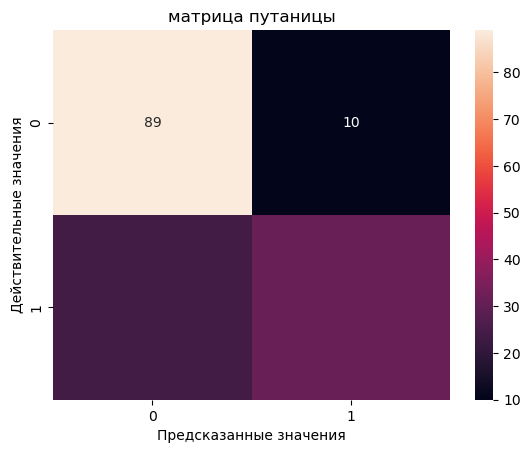

In [61]:
# 3

cls = LogisticRegression()
cls.fit(x_train, y_train)
y_pred = cls.predict(x_test)

class_names = [0, 1]

fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)

sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True)
plt.title("матрица путаницы")
plt.ylabel("Действительные значения")
plt.xlabel("Предсказанные значения")
plt.show()

In [196]:
# 4

print("достоверность:", "%.2f" % (100 * accuracy_score(y_test, y_pred)) + "%")
print(
    "точность:", "%.2f" % (100 * precision_score(y_test, y_pred, pos_label="1")) + "%"
)
print("полнота:", "%.2f" % (100 * recall_score(y_test, y_pred, pos_label="1")) + "%")

достоверность: 77.27%
точность: 72.73%
полнота: 58.18%


# 5

судя по матрице путаницы, модель часто совершает ошибку первого рода и не является оптимальной

In [71]:
# доп 1

svm_linear = SVC(kernel="linear", C=100)
svm_linear.fit(x_train, y_train)

SVC(C=100, kernel='linear')

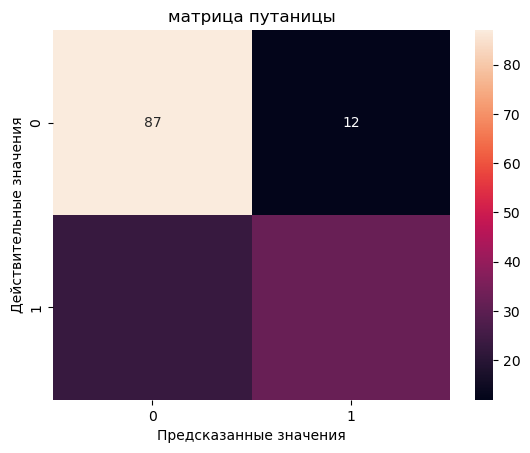

достоверность: 77.27%
точность: 72.73%
полнота: 58.18%


In [197]:
# доп 2

fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)

sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True)
plt.title("матрица путаницы")
plt.ylabel("Действительные значения")
plt.xlabel("Предсказанные значения")
plt.show()

y_pred = svm_linear.predict(x_test)
print("достоверность:", "%.2f" % (100 * accuracy_score(y_test, y_pred)) + "%")
print(
    "точность:", "%.2f" % (100 * precision_score(y_test, y_pred, pos_label="1")) + "%"
)
print("полнота:", "%.2f" % (100 * recall_score(y_test, y_pred, pos_label="1")) + "%")

# эта модель примерно такая же, как логистическая регрессия

In [198]:
# доп 3


def estimate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print()
    print(model)
    print("достоверность:", "%.2f" % (100 * accuracy_score(y_test, y_pred)) + "%")
    print(
        "точность:",
        "%.2f" % (100 * precision_score(y_test, y_pred, pos_label="1")) + "%",
    )
    print(
        "полнота:", "%.2f" % (100 * recall_score(y_test, y_pred, pos_label="1")) + "%"
    )


# LogisticRegression и SVC пробовали ранее

for model in (
    DecisionTreeClassifier(random_state=555),
    KNeighborsClassifier(),
    MLPClassifier(random_state=555),
    RandomForestClassifier(random_state=555),
    BaggingClassifier(
        estimator=DecisionTreeClassifier(random_state=555),
        n_estimators=100,
        random_state=555,
    ),
):
    estimate_model(model, X_train, X_test, y_train, y_test)


DecisionTreeClassifier(random_state=555)
достоверность: 71.43%
точность: 61.22%
полнота: 54.55%

KNeighborsClassifier()
достоверность: 73.38%
точность: 64.58%
полнота: 56.36%

MLPClassifier(random_state=555)
достоверность: 66.23%
точность: 53.06%
полнота: 47.27%

RandomForestClassifier(random_state=555)
достоверность: 79.87%
точность: 75.00%
полнота: 65.45%

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=555),
                  n_estimators=100, random_state=555)
достоверность: 79.87%
точность: 75.00%
полнота: 65.45%


# 4

без оптимизации гиперпараметров лучше всего проявили себя метод случайного леса и бэггинг